## Objectif 

Objectif :  Classer les pays selon les indicateurs de developpement 
c'est un problème de classification non supervisée ( CAH, Kmeans, ...)

Etape pour atteindre l'objectif :
- Description des données 
    Mieux connaitre nos données 
    - ACP ( savoir individus (pays qui se ressemblent et les variables qui se ressemblents, des pays aberrants, dtecter des groupes de variables - variables corrélés, ..)
          - ACP normée / non normée ( ecart-type---)
  -Facultative : ETude de stabilité des resultats de l'ACP par validation croisée, boostrap...(paper)
  - Facultative : ACP pondéré...
  ..............
     -Classification ==> Préréquis ? 
                     ==> effecteur la classification Kmeans et CAH
                     ==> hyperparamètre (k (des méthodes),distance, convergence,points initiaux (...variantes kmeans)
                     ==>  meilleur modèle ??? (référence) / 2,3 comparer à peu près les mêmes résulats, inertie inter et 
                     intra
   - Tracer une carte qui represente les pays par groupe 

- ACP et interprètation et graphique 
- Classificiation Kmeans et CAH( paramétrisation,choix des distances,points initiaux)
- Evaluation et comparaisons

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
#Repertoire courant 
os.chdir(r"C:\Users\ROUZOUMKA\Mes docs jupyter\Projet personnel\data\data")

In [4]:
data=  pd.read_csv("Data_cleaning.csv")

In [5]:
data.head()

,Unnamed: 0,Access_elec_pop,Access_elec_rural,Access_elec_urban,Agri_land,arab_land,bird_threatened,birth_rate_crude,fish_production,Death_rate,...,Pop_density,pop_growth,primary_education,rural_pop,secondary_education,Secure_Internet_server,surface_area,Terre_marine_protect_area,urban_pop,urban_growth
0,Country Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,98.715622,98.309603,99.902145,58.081365,11.798854,16.0,32.487000,2.050000e+03,6.423000,...,56.937049,2.384309,6.0,27694940.0,6.0,52.862480,6.528600e+05,0.104707,9476982.0,3.349934
2,Africa Eastern and Southern,42.168241,26.813900,71.994933,44.117980,8.247616,655.0,33.913034,4.115035e+06,7.521453,...,43.431367,2.665620,6.0,412813896.0,6.0,1164.559933,1.512116e+07,14.997499,230276235.0,4.046987
3,Africa Western and Central,51.253253,28.104923,80.357898,39.953545,11.224018,338.0,37.148465,4.178921e+06,10.166492,...,48.114080,2.704168,6.0,232268264.0,7.0,89.707350,9.166270e+06,14.198423,202961117.0,4.074033
4,Albania,100.000000,100.000000,100.000000,42.849672,22.311898,8.0,11.780000,8.648300e+03,7.898000,...,104.612263,-0.246732,5.0,1137407.0,7.0,526.099856,2.875000e+04,13.525683,1728969.0,1.317162


In [6]:
T = data.iloc[:,1:]
X = T.drop(0, axis=0)

In [7]:
X.head()

,Access_elec_pop,Access_elec_rural,Access_elec_urban,Agri_land,arab_land,bird_threatened,birth_rate_crude,fish_production,Death_rate,fish_threatened,...,Pop_density,pop_growth,primary_education,rural_pop,secondary_education,Secure_Internet_server,surface_area,Terre_marine_protect_area,urban_pop,urban_growth
1,98.715622,98.309603,99.902145,58.081365,11.798854,16.0,32.487000,2.050000e+03,6.423000,4.0,...,56.937049,2.384309,6.0,27694940.0,6.0,52.862480,6.528600e+05,0.104707,9476982.0,3.349934
2,42.168241,26.813900,71.994933,44.117980,8.247616,655.0,33.913034,4.115035e+06,7.521453,1075.0,...,43.431367,2.665620,6.0,412813896.0,6.0,1164.559933,1.512116e+07,14.997499,230276235.0,4.046987
3,51.253253,28.104923,80.357898,39.953545,11.224018,338.0,37.148465,4.178921e+06,10.166492,989.0,...,48.114080,2.704168,6.0,232268264.0,7.0,89.707350,9.166270e+06,14.198423,202961117.0,4.074033
4,100.000000,100.000000,100.000000,42.849672,22.311898,8.0,11.780000,8.648300e+03,7.898000,44.0,...,104.612263,-0.246732,5.0,1137407.0,7.0,526.099856,2.875000e+04,13.525683,1728969.0,1.317162
5,99.641922,98.961946,99.898178,17.364964,3.151063,15.0,24.282000,1.152550e+05,4.716000,41.0,...,17.730062,2.007399,5.0,11558339.0,7.0,67.608505,2.381741e+06,7.105493,30670076.0,2.805020


In [8]:
#dimension
X.shape

(220, 37)

In [9]:
n = X.shape[0]
p = X.shape[1]
n

220

In [10]:
p

37

###  ACP normée ou pas ?

In [11]:
X.describe()

,Access_elec_pop,Access_elec_rural,Access_elec_urban,Agri_land,arab_land,bird_threatened,birth_rate_crude,fish_production,Death_rate,fish_threatened,...,Pop_density,pop_growth,primary_education,rural_pop,secondary_education,Secure_Internet_server,surface_area,Terre_marine_protect_area,urban_pop,urban_growth
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,...,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,2.200000e+02,220.000000,2.200000e+02,220.000000
mean,85.269024,78.908331,93.226178,38.083635,14.312586,211.190909,20.159670,4.108018e+06,7.710662,357.700000,...,182.788015,1.336542,5.763636,1.588915e+08,6.381818,8971.132624,5.770260e+06,12.722113,1.778607e+08,2.039367
std,23.416282,31.306444,12.986622,19.717104,12.943893,522.205360,9.602692,1.145492e+07,2.516114,844.932453,...,583.656270,1.081376,0.776978,4.614209e+08,0.847848,24742.854790,1.443391e+07,11.223265,4.832378e+08,1.446223
min,10.121517,1.000000,32.325947,0.538462,0.086281,0.000000,6.400000,0.000000e+00,1.202000,0.000000,...,2.035771,-1.718541,4.000000,0.000000e+00,4.000000,0.452263,1.800000e+02,0.000390,1.431600e+04,-1.549495
25%,76.640459,62.232118,92.153309,24.981651,4.938380,12.000000,11.561666,1.364625e+04,6.224500,18.000000,...,35.178441,0.494716,6.000000,9.038582e+05,6.000000,68.870249,4.257500e+04,4.214850,1.921663e+06,0.841405
50%,99.229529,98.544579,99.800000,38.699938,10.781997,19.000000,18.031556,1.469045e+05,7.297800,40.500000,...,70.048842,1.245732,6.000000,6.760734e+06,6.000000,419.651132,3.057850e+05,11.119330,8.144940e+06,1.991156
75%,100.000000,100.000000,100.000000,49.055705,18.302117,75.000000,27.977750,2.040149e+06,9.100000,121.250000,...,138.911549,2.099779,6.000000,3.778149e+07,7.000000,5321.251215,2.092038e+06,18.453906,6.141824e+07,3.070251
max,100.000000,100.000000,100.000000,80.769320,59.800000,3647.000000,46.079000,7.490545e+07,15.400000,5873.000000,...,7952.998590,4.921024,8.000000,3.177435e+09,9.000000,264256.629669,9.855128e+07,82.942357,3.231695e+09,6.186430


In [12]:
X.std()

Access_elec_pop                                 2.341628e+01
Access_elec_rural                               3.130644e+01
Access_elec_urban                               1.298662e+01
Agri_land                                       1.971710e+01
arab_land                                       1.294389e+01
bird_threatened                                 5.222054e+02
birth_rate_crude                                9.602692e+00
fish_production                                 1.145492e+07
Death_rate                                      2.516114e+00
fish_threatened                                 8.449325e+02
Forest_area                                     2.266435e+01
GPD                                             8.380256e+12
Land_area                                       1.402953e+07
mammal_species_Threatened                       4.119831e+02
Merch_exports                                   1.869681e+12
Merch_export_residual                           7.236299e+00
Merch_export_high_income

Nous réaliserons une ACP normée, c'est à dire les données seront centrées et réduites. en effet, les écart-types des variables sont très éloignés.


In [13]:
#standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Z = sc.fit_transform(X)

In [14]:
Z.shape

(220, 37)

In [15]:
# ecartype ==1  et moyenne proche de 0
print(Z.std(axis=0),Z.mean(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [-6.87328982e-16 -1.21115239e-17  4.62256496e-16  3.22973971e-17
 -3.02788098e-17 -1.36254644e-17 -5.45018576e-17  1.41301112e-17
  9.68921912e-17  2.11951668e-17  1.33226763e-16 -2.32137542e-17
 -2.01858732e-17  3.53252781e-18 -2.42230478e-17 -8.07434927e-18
  1.89747208e-16  4.03717464e-17  2.74527875e-16  4.03717464e-17
 -3.83531590e-17  6.29799243e-16 -1.93784382e-16 -4.23903337e-17
 -2.42230478e-17  4.03717464e-18 -1.81672859e-17  3.63345717e-17
  6.45947942e-17 -1.09003715e-16 -5.04646829e-17 -4.44089210e-17
 -3.63345717e-17  5.65204449e-17 -8.47806673e-17  2.01858732e-17
  3.63345717e-17]


 ### ACP et Resultats généraux

In [16]:
from sklearn.decomposition import PCA

In [17]:
acp = PCA(svd_solver = "full")
#Projection sur les nouveaux axes
Xc= acp.fit_transform(Z)
print(Xc)

[[-1.32134106e+00  2.12435568e+00 -1.38880507e+00 ...  8.48839323e-03
   1.13274351e-02 -1.07219287e-03]
 [ 1.51547769e+00  4.20534619e+00 -5.89343253e-01 ...  2.85351864e-02
   4.32417710e-02 -1.60848491e-03]
 [ 5.69159999e-01  3.68272566e+00 -1.26356435e+00 ...  2.91519580e-02
  -4.03723224e-02 -6.21975452e-05]
 ...
 [-1.23668489e+00  3.39109612e+00  1.41860533e-01 ...  3.68727610e-02
  -1.29899804e-02 -4.09135816e-04]
 [-1.17632468e+00  4.04342046e+00  9.45655626e-01 ... -3.55360690e-03
  -3.49938786e-03  1.98472148e-04]
 [-1.34257412e+00  2.32532272e+00 -3.15791945e-01 ...  1.10044786e-02
   6.71597552e-03 -9.43191266e-06]]


<AxesSubplot:>

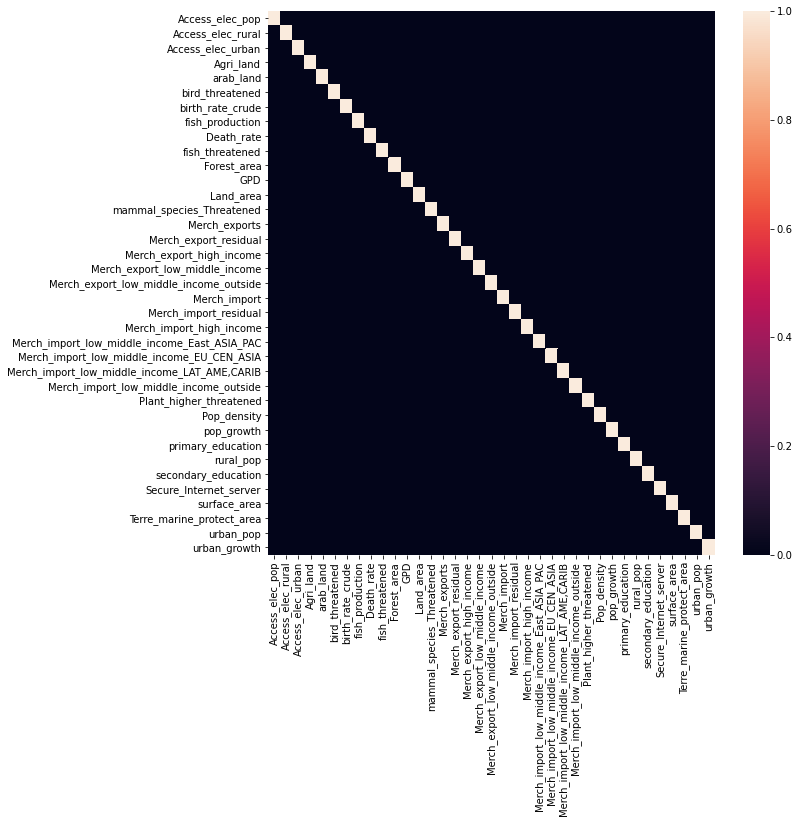

In [18]:
#matrice de correlation
corr = np.corrcoef(Xc,rowvar=False)

# plot the heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=data.columns[1:],
        yticklabels=data.columns[1:]) #variables sont décorrélées 

In [19]:
print(acp.n_components_) #par défaut nombre de colonnes 

37


In [20]:
# valeurs propres / variances expliquées par chaque axe
acp.explained_variance_

array([1.02455501e+01, 6.38557108e+00, 2.80644678e+00, 2.38842583e+00,
       1.89570981e+00, 1.61305668e+00, 1.38925241e+00, 1.34768742e+00,
       1.15263207e+00, 1.04740518e+00, 9.23820893e-01, 8.66701312e-01,
       8.22157422e-01, 7.65650608e-01, 6.79537289e-01, 6.08297842e-01,
       4.01829928e-01, 3.00507087e-01, 2.65927873e-01, 2.08614854e-01,
       1.92689602e-01, 1.68044833e-01, 1.42632498e-01, 1.23716205e-01,
       1.09473434e-01, 8.79997498e-02, 7.92479262e-02, 4.62903683e-02,
       4.02387832e-02, 2.25221850e-02, 1.66011463e-02, 1.47300783e-02,
       4.25083007e-03, 3.24677230e-03, 1.98893961e-03, 4.86529556e-04,
       7.39343631e-06])

In [21]:
#valeur corrigée (sous R)
eigval = (n-1)/n*acp.explained_variance_ 
print(eigval)

[1.01989794e+01 6.35654576e+00 2.79369021e+00 2.37756935e+00
 1.88709295e+00 1.60572461e+00 1.38293763e+00 1.34156157e+00
 1.14739283e+00 1.04264424e+00 9.19621707e-01 8.62761760e-01
 8.18420343e-01 7.62170378e-01 6.76448483e-01 6.05532851e-01
 4.00003428e-01 2.99141146e-01 2.64719110e-01 2.07666605e-01
 1.91813740e-01 1.67280993e-01 1.41984168e-01 1.23153859e-01
 1.08975827e-01 8.75997509e-02 7.88877083e-02 4.60799575e-02
 4.00558796e-02 2.24198114e-02 1.65256866e-02 1.46631234e-02
 4.23150812e-03 3.23201424e-03 1.97989897e-03 4.84318058e-04
 7.35982979e-06]


In [22]:
#proportion de variance expliquée
prct_eigen_value=acp.explained_variance_ratio_*100
print(acp.explained_variance_ratio_)

[2.75648093e-01 1.71798534e-01 7.55051407e-02 6.42586310e-02
 5.10025121e-02 4.33979623e-02 3.73766926e-02 3.62584207e-02
 3.10106171e-02 2.81795742e-02 2.48546407e-02 2.33178854e-02
 2.21194687e-02 2.05991994e-02 1.82823914e-02 1.63657527e-02
 1.08109035e-02 8.08489582e-03 7.15457055e-03 5.61261095e-03
 5.18415515e-03 4.52110792e-03 3.83740995e-03 3.32848267e-03
 2.94529262e-03 2.36756084e-03 2.13210022e-03 1.24540426e-03
 1.08259134e-03 6.05940849e-04 4.46640178e-04 3.96300632e-04
 1.14365084e-04 8.73517363e-05 5.35107830e-05 1.30896773e-05
 1.98914319e-07]


In [23]:
#Resultats Généraux
dic={"valeurs_propres": eigval,"percent_valeurs_propres":prct_eigen_value,"perct_cumulées":np.cumsum(prct_eigen_value)}
res = pd.DataFrame(dic)
res.head()

,valeurs_propres,percent_valeurs_propres,perct_cumulées
0,10.198979,27.564809,27.564809
1,6.356546,17.179853,44.744663
2,2.793690,7.550514,52.295177
3,2.377569,6.425863,58.721040
4,1.887093,5.100251,63.821291


Text(0.5, 0, 'Dimensions')

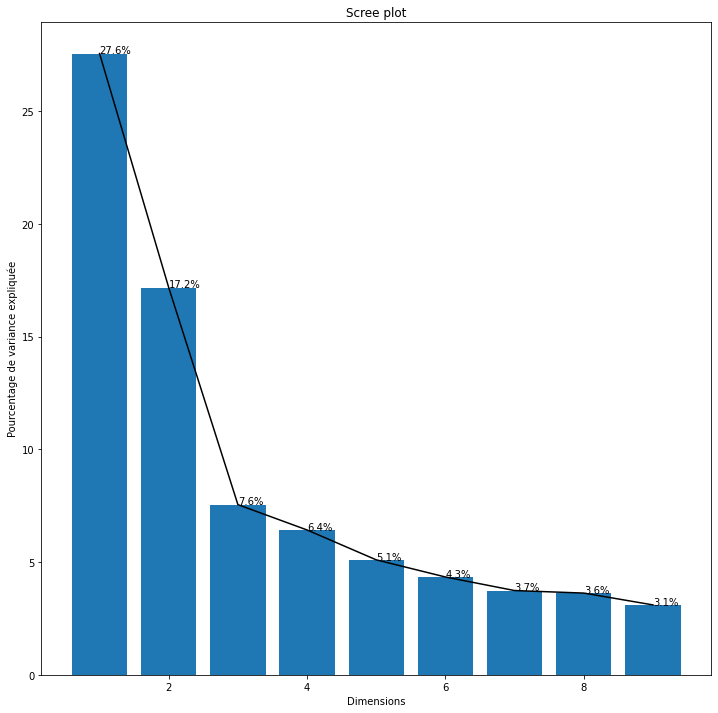

In [24]:
#scree plot
n=9
fig, axes = plt.subplots(figsize=(12,12))
plt.bar(res.index[0:n]+1,prct_eigen_value[0:n])
plt.plot(res.index[0:n]+1,prct_eigen_value[0:n],c="black")

labels = [str(round(prct,1)) + "%" for prct in prct_eigen_value]
for i in range(0,n):
    plt.annotate(labels[i],(i+1,prct_eigen_value[i]))
plt.title("Scree plot")
plt.ylabel("Pourcentage de variance expliquée")
plt.xlabel("Dimensions")

### Resultat ACP individu

In [25]:
# qualité de representation sur l'axe j
def Cos2(Z,Xc,j):
    dj = np.sum(Z**2,axis=1)
    cos2 = Xc**2
    return cos2[:,j]/dj

#contributions des individus aux axes
def contrib(Xc,eigval,j):
    n= Xc.shape[0]
    ctr= Xc**2
    return ctr[:,j]/(n*eigval[j])

#Resultats individus
n=5
tab_cos2=pd.DataFrame({f'cos_{j+1}':Cos2(Z,Xc,j) for j in range(0,n)} )
tab_contrib=pd.DataFrame({f'contrib_{j+1}':contrib(Xc,eigval,j) for j in range(0,n)} )

In [26]:
### cos2 : qualité de la representation des individus
tab_cos2.head()

,cos_1,cos_2,cos_3,cos_4,cos_5
0,0.047866,0.123723,0.052878,0.242821,0.098246
1,0.102116,0.786322,0.015443,0.020097,0.001646
2,0.016040,0.671534,0.079054,0.021346,0.006822
3,0.125211,0.538711,0.111533,0.001750,0.009601
4,0.065208,0.006023,0.019819,0.116086,0.024121


In [27]:
### Contribution des individus à la construction des axes
tab_contrib

,contrib_1,contrib_2,contrib_3,contrib_4,contrib_5
0,0.000778,0.003227,0.003138,0.016933,0.008632
1,0.001024,0.012646,0.000565,0.000864,0.000089
2,0.000144,0.009698,0.002598,0.000824,0.000332
3,0.000798,0.005507,0.002594,0.000048,0.000331
4,0.000492,0.000073,0.000546,0.003758,0.000984
...,...,...,...,...,...
215,0.000753,0.002255,0.002735,0.000052,0.008873
216,0.000389,0.000422,0.000101,0.002309,0.004713
217,0.000682,0.008223,0.000033,0.001851,0.006772
218,0.000617,0.011691,0.001455,0.014427,0.001374


In [28]:
h=tab_contrib.sort_values(by='contrib_1', ascending=False)
h

,contrib_1,contrib_2,contrib_3,contrib_4,contrib_5
90,1.792985e-01,0.000250,9.176634e-04,1.120533e-04,0.000412
122,1.695176e-01,0.000316,8.762530e-04,1.368434e-04,0.000469
137,1.283936e-01,0.000002,2.564060e-04,1.811938e-04,0.000230
89,8.824581e-02,0.000393,2.685579e-07,1.669606e-04,0.000026
212,3.659555e-02,0.000993,3.588023e-04,6.485752e-07,0.000123
...,...,...,...,...,...
181,1.442296e-05,0.000302,8.762774e-04,1.009868e-03,0.000414
170,1.234145e-05,0.004292,1.789292e-03,1.679029e-03,0.009810
91,5.775091e-06,0.004762,5.891818e-04,1.235862e-05,0.000040
136,7.335526e-07,0.000214,1.056640e-03,3.591967e-03,0.001817


### Graphique des indivudus

In [29]:
def Graphique_individu(Z,Xc,i,j,label=[],add_anot=False,add_cos2=True):
    sns.set_theme()
    fig, axes = plt.subplots(figsize=(16,12)) 
    n = Xc.shape[0]
    x = Xc[:,i]
    y = Xc[:,j]
    cos2 = Cos2(Z,Xc,i) +  Cos2(Z,Xc,j)
    #limites des axes
    x_min, x_max = np.min(x) ,np.max(x)
    y_min, y_max = np.min(y),np.max(y)
    axes.set_xlim(x_min-2,x_max+2) #même limites en abscisse 
    axes.set_ylim(y_min-2,y_max+2) #et en ordonnée
    plt.scatter(x,y,marker='o',c=cos2)
    #placement des étiquettes des observations
    if add_anot == True :
        for i in range(n):
            plt.annotate(label[i],(x[i],y[i]))
    #ajouter les axes
    plt.plot([x_min-2,x_max+2,],[0,0],color='silver',linestyle='--',linewidth=2) 
    plt.plot([0,0],[y_min-2,y_max+2],color='silver',linestyle='--',linewidth=2)
    #affichage
    axes.set_xlabel(label[i])
    axes.set_ylabel(label[j])
    axes.set_title("Nuage des individus")
    plt.colorbar(label="cos2", orientation="vertical",aspect=5,fraction=0.1) 
    plt.show()

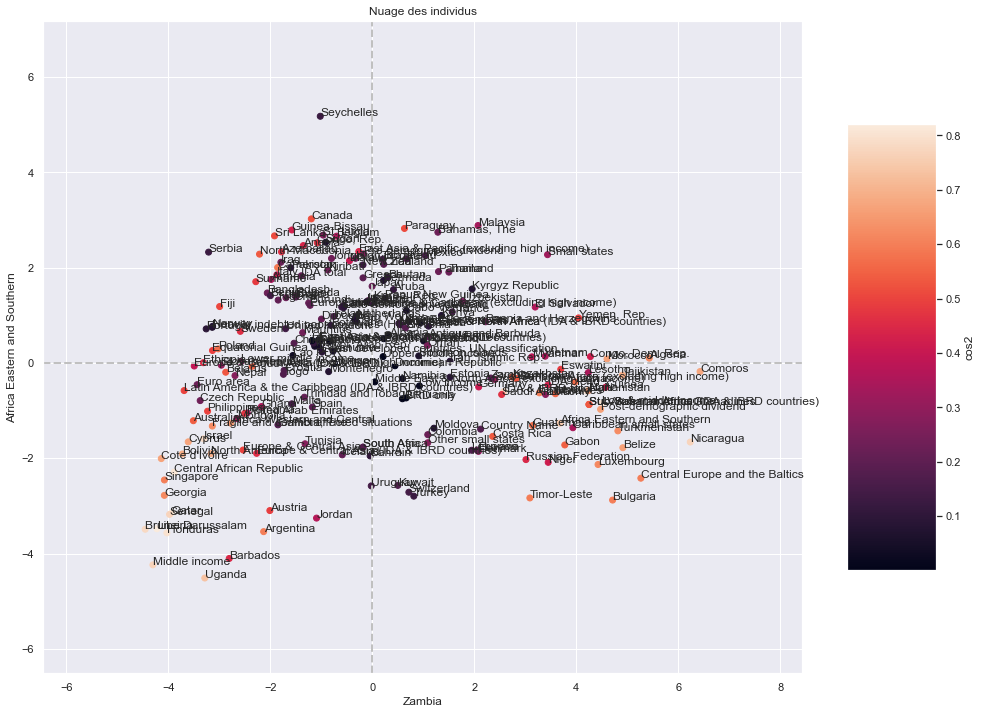

In [30]:
%matplotlib inline
Graphique_individu(Z,Xc,1,2, add_anot=True, label=data.iloc[:,0])

### Resultat ACP variables

In [31]:
### correlations avec les dimesnsions / cos2 / coord 
#le champ components_ de l'objet ACP
print(acp.components_) #vecteurs propres

[[ 1.08532577e-02  1.04660974e-02  1.72281202e-02 ...  1.59736660e-02
   3.06021774e-01  1.15594622e-02]
 [-3.35453930e-01 -3.37266048e-01 -3.04051584e-01 ... -3.35503033e-02
  -7.63519419e-03  3.50115146e-01]
 [ 1.44590045e-01  1.24821782e-01  1.30477127e-01 ... -6.61099433e-02
  -2.18600274e-02  1.52542077e-02]
 ...
 [ 5.62714583e-03 -2.66152652e-04 -3.70420151e-03 ...  6.56421975e-03
  -6.08558337e-01 -2.85899497e-03]
 [ 1.74639309e-02 -6.67184153e-03 -4.94817934e-03 ...  9.64844556e-04
  -2.50891759e-01 -1.18245256e-02]
 [-4.55507896e-04  4.64899056e-04  2.43719965e-04 ...  3.44877420e-04
   3.12461505e-02 -5.41871029e-04]]


In [32]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p)) 
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#Tableau des corrélations variables x facteurs    
tab_corvar=pd.DataFrame(corvar,columns = [f'dim_{i+1}' for i in range(0,p)])

In [33]:
tab_corvar.shape

(37, 37)

In [34]:
#cercle des corrélations
def Cercle_correlation(corvar,i,j,label=[],add_anot=False,add_cos2=True):
    fig, axes = plt.subplots(figsize=(12,12)) 
    axes.set_xlim(-1.5,1.5)
    axes.set_ylim(-1.5,1.5)
    p = corvar.shape[1]
    x = corvar[:,i]
    y = corvar[:,j]
    #cosinus carré des variables
    cos2var = corvar**2
    cos2 =  cos2var[:,i] + cos2var[:,j] 
    for j in range(p):
            plt.arrow(0, 0, x[j],y[j], width =0.00001,color="black")
    #affichage des étiquettes (noms des variables)
    if add_anot == True :
        for j in range(p):
            plt.annotate(label[j],(x[j],y[j]))
            plt.arrow(0, 0, x[j],y[j], width =0.00001,color="black")
    #ajouter les axes
    plt.plot([-1.5,1.5],[0,0],color='silver',linestyle='--',linewidth=1) 
    plt.plot([0,0],[-1.5,1.5],color='silver',linestyle='--',linewidth=1)
    #ajouter un cercle
    cercle = plt.Circle((0,0),1,color='grey',fill=False) 
    axes.add_artist(cercle)
    #plt.colorbar(label="cos2", orientation="vertical",aspect=5,fraction=0.1) 
    plt.show()

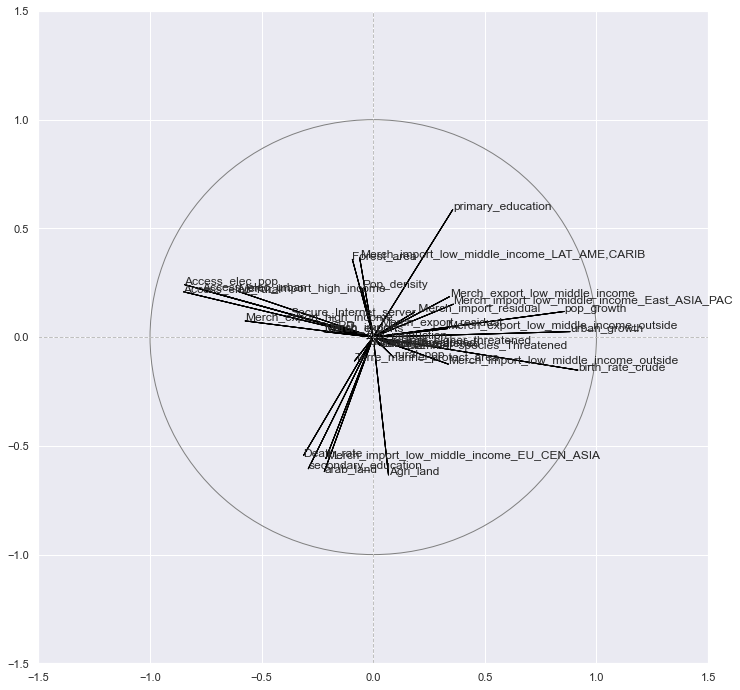

In [35]:
Cercle_correlation(corvar,1,2,label=data.columns[1:],add_anot=True,add_cos2=True)

# Stratégies de détermination du nombre d’axes en ACP (Analyse en Composantes Principales).

Le choix du nombre de facteurs est très important surtout quant on utilise l'ACP comme une méthode de pré-traitement des données. L’enjeu est de distinguer d’une part l’information 
pertinente  (le  « signal »),  véhiculée  par  les  axes que  l’on  choisit  de  retenir ; et  d’autre  part, 
l’information  résiduelle  – le  « bruit »  issu  des  fluctuations  d’échantillonnage  – traduite  par  les 
derniers facteurs que l’on choisit de négliger.

## 1. Scree plot

## Scree plot

Cattell (1966, 1977) propose d’étudier la courbe de décroissance des valeurs propres (k). L’idée est 
de détecter les « coudes » (les « cassures ») signalant un changement de structure. Cette approche 
est intéressante parce qu’elle est nuancée. Elle permet de dépasser l’arbitraire purement numérique. 
Mais elle  est  compliquée  à  mettre  en  œuvre  parce  qu’elle  est  justement  soumise à notre 
appréciation. La détection n’est pas toujours évidente. Il faut répondre à plusieurs questions : Où est 
situé le coude ? Est-ce qu’il est unique ? Est-ce que nous l’incluons ou pas dans la sélection ?
En règle générale, le coude est très marqué lorsque nous traitons des variables fortement corrélées. 
Lorsqu’elles le sont faiblement ou lorsqu’il y a des blocs de variables corrélées, plutôt qu’une solution 
unique « évidente », nous devons faire face à plusieurs scénarios. Concernant l’intégration du coude 
dans la sélection, Cattel lui-même a varié. Dans un premier temps (Cattell, 1966), il conseillait de ne 
sélectionner  que  les  facteurs  qui  sont  avant  le  coude ;  puis,  dans  un  second  temps  (1977),  il 
préconise finalement de l’intégrer. Tout dépend de la valeur associée au coude en réalité. Si elle est 
faible, on peut négliger le facteur. Nous devons le sélectionner en revanche si elle est élevée

Text(0.5, 0, 'Dimensions')

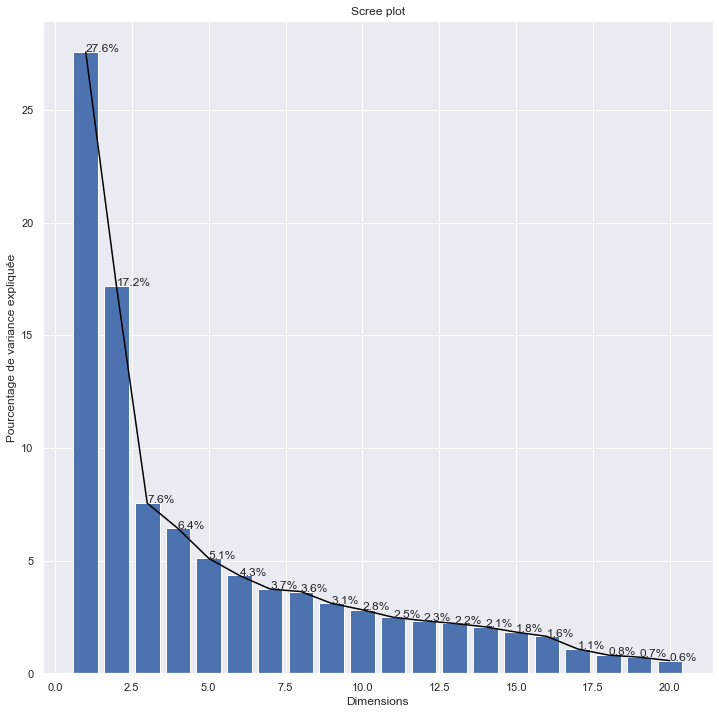

In [36]:
#scree plot
n=20
fig, axes = plt.subplots(figsize=(12,12))
plt.bar(res.index[0:n]+1,prct_eigen_value[0:n])
plt.plot(res.index[0:n]+1,prct_eigen_value[0:n],c="black")

labels = [str(round(prct,1)) + "%" for prct in prct_eigen_value]
for i in range(0,n):
    plt.annotate(labels[i],(i+1,prct_eigen_value[i]))
plt.title("Scree plot")
plt.ylabel("Pourcentage de variance expliquée")
plt.xlabel("Dimensions")

Deux coudes semblent appraitre en k = 3 et k=5. lequel chosisir ? est-ce que nous devons inclure les coudes à l'intérieur? 
si nous prenons k = 3, le coude explique 7.6 % de l'inertie totale qui relativement comparrée aux deux premieres dimension. elle ne doit pas être incluse.
si nous prenons k=5,  le coude ne doit aussi pas être inclu dans à l'intérieur. pour choisir lequel des coudes choisir on peut representer le pourcentage cumulé des variances expliquées

Text(0.5, 0, 'Dimensions')

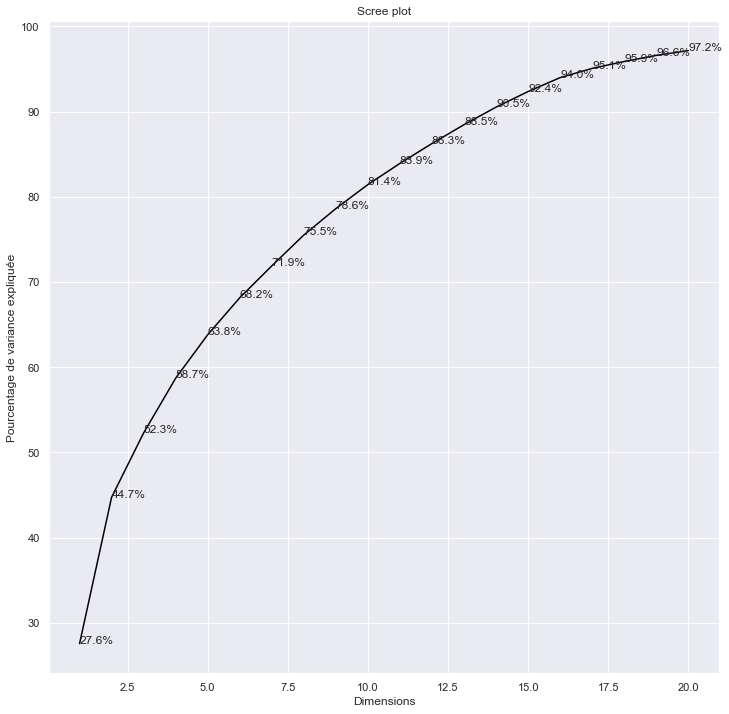

In [37]:
#scree plot
n=20
fig, axes = plt.subplots(figsize=(12,12))
prct_cum=np.cumsum(prct_eigen_value)
plt.plot(res.index[0:n]+1,prct_cum[0:n],c="black")

labels = [str(round(prct,1)) + "%" for prct in prct_cum]
for i in range(0,n):
    plt.annotate(labels[i],(i+1,prct_cum[i]))
plt.title("Scree plot")
plt.ylabel("Pourcentage de variance expliquée")
plt.xlabel("Dimensions")

On remarque en ajoutant en prenant k=3 on depasse la barre des 50% des variances expliqués

## Proportion d’inertie expliquée

On est parfois tenté d’utiliser explicitement la part de variance expliquée pour déterminer le nombre 
de facteurs. La règle serait alors : « sélectionner suffisamment d’axes pour expliquer au moins x% de 
l’inertie totale ». Cette stratégie est descendue en flammes par toutes les références que j’ai pu 
consulter.  Pour  la  simple  raison  qu’elle  ne  tient  pas  compte  du tout  des  corrélations entre  les 
variables. si on veut avoir 80% de variance expliquée on va prendre k = 12.

## 2. Règles de Kaiser simples et améliorées

##  Règle de Kaiser - Guttman

La règle de Kaiser repose sur une idée simple. Dans une ACP normée, la somme des valeurs propres 
étant égale au nombre de variables, leur moyenne vaut 1. Nous considérons par conséquent qu’un 
axe est intéressant si sa valeur propre est supérieure 1.

In [38]:
res.loc[res.valeurs_propres>1,:]

,valeurs_propres,percent_valeurs_propres,perct_cumulées
0,10.198979,27.564809,27.564809
1,6.356546,17.179853,44.744663
2,2.793690,7.550514,52.295177
3,2.377569,6.425863,58.721040
4,1.887093,5.100251,63.821291
5,1.605725,4.339796,68.161087
6,1.382938,3.737669,71.898757
7,1.341562,3.625842,75.524599
8,1.147393,3.101062,78.625660
9,1.042644,2.817957,81.443618


k= 9 est choisi par cette règle

## Règle de Karlis – Saporta - Spinaki 

On pense généralement que le seuil 1 est trop permissif c.-à-d. nous retenons plus d’axes factoriels 
qu’il n’en faut. Il n’est réellement fondé que si les variables sont fortement corrélées, autrement il 
faudrait le relever. Une règle plus restrictive consiste à le définir comme suit : moyenne des valeurs 
propres + 2 fois leur écart-type (Saporta, 2006 ; page 172). Elle rappelle la définition de la valeur 
critique d’un test unilatéral de conformité à 5%, où la statistique suit asymptotiquement une loi 
normale.

La règle d’acceptation devient maintenant : 
$\lambda > 1 + 2 \sqrt{\frac{p-1}{n-1}}$

In [39]:
seuil = 1 + 2 * np.sqrt((p-1)/(n-1))
res.loc[res.valeurs_propres>seuil,:]

,valeurs_propres,percent_valeurs_propres,perct_cumulées
0,10.198979,27.564809,27.564809
1,6.356546,17.179853,44.744663


On retiendra que les deux premiers axes.

## 3. Tests de Bartlett ( Comparaison des variances)

## Existence des facteurs pertinents

Ce test sert à détecter l’existence de relations intéressantes entre les variables de notre fichier4. 
Formellement, l’hypothèse nulle (H0) du test de sphéricité de Bartlett correspond à : « toutes les 
valeurs propres sont identiques, elles sont égales à 1 ». Si on rejette H0, on sait qu’il existe au moins 
un facteur pertinent dans l’ACP. Nous ne pouvons pas spécifier leur nombre toutefois.

## Détection du nombre de facteurs pertinents

Une variante du test de sphéricité de Bartlett peut être utilisée pour déterminer le nombre d’axes. 
Formellement, elle n’est valable que pour l’ACP non-normée, c.-à-d. calculée à partir de la matrice de 
variance covariance (Saporta, 2006, page 171 ; Grossman et al., 1991). Il semble néanmoins qu’elle 
soit applicable pour l’ACP normée, tout en sachant qu’elle s’avère conservatrice dans ce cas c.-à-d. 
elle a tendance à sélectionner moins de facteurs qu’il ne faudrait (Jackson, 1993 ; Neto et al., 2004). 
Moi je n’ai pas d’a priori, nous allons voir ce qu’il en est sur notre fichier de données.

## 4. Test des « bâtons brisés »

Ce test est du à Frontier (1976) et Legendre-Legendre (1983). Il repose sur l’idée que si l’inertie totale 
était dispatchée aléatoirement sur les axes, la distribution des valeurs propres suivrait la loi des 
« bâtons brisés » (broken-stick). Elle a été tabulée semble-t-il. Mais il est très facile de calculer la 
valeur critique pour le choix de « k » facteurs.

In [42]:
data_red=pd.DataFrame(Xc[:,0:10])
data_red.to_csv(r"C:\Users\ROUZOUMKA\Mes docs jupyter\Projet personnel\data\data_red.csv")